In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedKFold, GridSearchCV

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('step1_output.csv')
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172414 entries, 0 to 172413
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   favorite_count             172414 non-null  int64  
 1   tweet_id                   172414 non-null  int64  
 2   text                       172414 non-null  object 
 3   in_reply_to_status_id_str  25743 non-null   float64
 4   in_reply_to_user_id_str    29434 non-null   float64
 5   in_reply_to_screen_name    29427 non-null   object 
 6   is_quote_status            172414 non-null  int64  
 7   country_code               172414 non-null  int64  
 8   possibly_sensitive         140392 non-null  object 
 9   quoted_status_id_str       43736 non-null   float64
 10  retweet_count              172414 non-null  int64  
 11  user_id                    172414 non-null  int64  
 12  name                       172399 non-null  object 
 13  screen_name                17

In [4]:
df = df.drop(['tweet_id', 'user_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'quoted_status_id_str', 'text', 'in_reply_to_screen_name', 'name', 'screen_name', 'location', 'description'], axis=1)

In [5]:
cat_cols_1 = ['possibly_sensitive']

poss_sens_le = LabelEncoder()
poss_sens_col_encoded = poss_sens_le.fit_transform(df[cat_cols_1[0]])
df[cat_cols_1[0]] = poss_sens_col_encoded

In [6]:
df

,favorite_count,is_quote_status,country_code,possibly_sensitive,retweet_count,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,default_profile,default_profile_image,tweet_created_at_minute,tweet_created_at_hour,tweet_created_at_day,tweet_created_at_week_day,user_created_at_minute,user_created_at_hour,user_created_at_months,user_created_at_year,user_created_at_day,user_created_at_week_day,hashtag_count,urls_count,user_mentions_count
0,0,0,111,0,0,0,125,141,0,44,272830,0,0,4,5,20,1,55,17,7,2012,31,1,0,1,0
1,0,0,111,0,0,0,439,480,0,14753,12736,1,0,4,5,20,1,23,15,11,2020,7,1,0,1,0
2,0,1,111,0,1,0,80,57,0,1636,448,1,0,4,5,20,1,9,13,3,2014,10,1,0,1,0
3,0,0,111,2,0,0,119,76,12,12,6786,1,0,4,5,20,1,31,16,3,2010,24,1,0,1,0
4,0,0,111,0,0,0,26889,13732,1268,2658,649692,0,0,5,5,20,1,44,8,6,2009,13,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172409,1,0,111,0,0,0,777,11,6,1,4464,1,0,4,5,21,0,51,21,7,2020,31,0,0,1,0
172410,1,0,111,2,0,0,106,228,0,9848,10456,1,0,4,5,21,0,28,0,8,2020,13,0,0,1,0
172411,0,0,111,0,0,0,1,0,0,0,30784,1,0,4,5,21,0,21,15,11,2020,30,0,0,1,0
172412,1,0,111,2,0,0,188,412,1,5632,8431,0,0,4,5,21,0,20,22,5,2011,24,0,0,1,0


# Feature Correlation Analysis

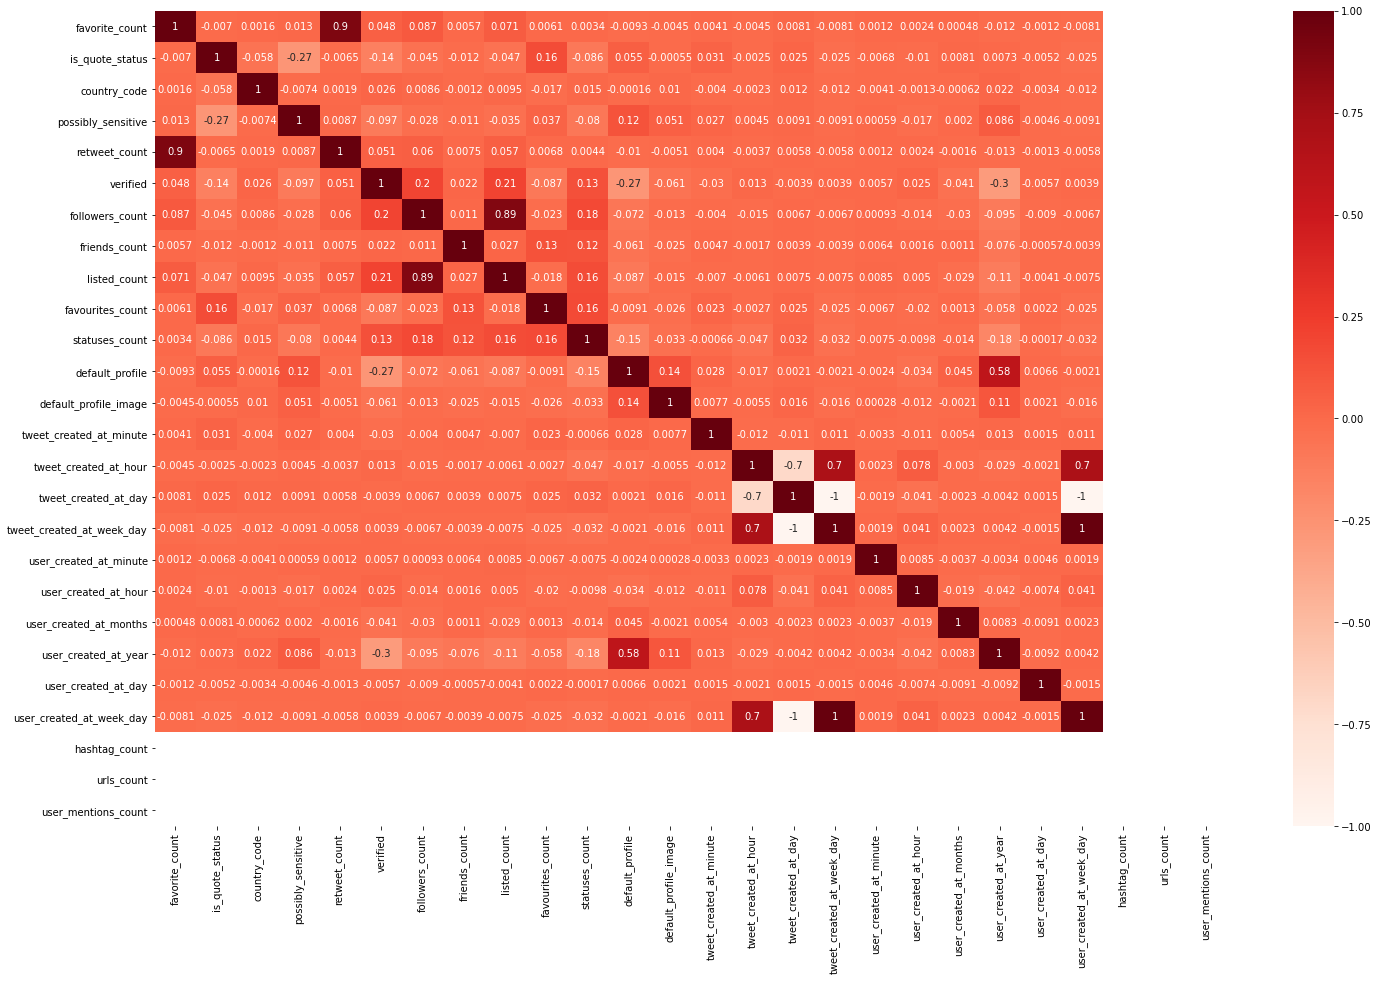

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(24,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
#Correlation with output variable
cor_target = abs(cor["retweet_count"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

favorite_count    0.903069
retweet_count     1.000000
Name: retweet_count, dtype: float64

In [9]:
# Shuffle the Dataset.
shuffled_train = df.sample(frac=1, random_state=4)

# # Put all the samples where they dont have zeros re-tweet in a separate dataset.
# non_zero_retweet = shuffled_train.loc[shuffled_train['retweet_count'] != 0]
# nbr_samples = non_zero_retweet.shape[0] // 2

# #Randomly select samples observations from the zero re-tweet (majority class)
# zero_retweet = shuffled_train.loc[shuffled_train['retweet_count'] == 0].sample(n=nbr_samples, random_state=42)

# print("Shape of non_zero_retweet: ", non_zero_retweet[:nbr_samples].shape)
# print("Shape of zero_retweet: ", zero_retweet.shape)

# # Concatenate both dataframes again
# train_data = pd.concat([non_zero_retweet[:nbr_samples], zero_retweet])
# #train_data_new = non_zero_retweet
# print("Normalized train dataset: ", train_data.shape)

train_data = shuffled_train
print("Normalized train dataset: ", train_data.shape)

Normalized train dataset:  (172414, 26)


In [10]:
train_data

,favorite_count,is_quote_status,country_code,possibly_sensitive,retweet_count,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,default_profile,default_profile_image,tweet_created_at_minute,tweet_created_at_hour,tweet_created_at_day,tweet_created_at_week_day,user_created_at_minute,user_created_at_hour,user_created_at_months,user_created_at_year,user_created_at_day,user_created_at_week_day,hashtag_count,urls_count,user_mentions_count
111063,0,0,111,2,0,0,482,745,8,1408,2223,1,0,28,19,20,1,33,2,1,2012,6,1,0,1,0
1833,7,0,111,2,0,0,16637,16359,17,337975,297365,0,0,27,5,20,1,44,0,10,2013,6,1,0,1,0
170375,0,0,111,2,0,0,0,23,0,3,12,1,1,35,4,21,0,2,8,6,2020,9,0,0,1,0
88200,0,0,111,0,0,0,840,5001,3,1651,2444,1,0,55,16,20,1,50,15,6,2016,10,1,0,1,0
146940,1,0,111,2,0,0,249,612,0,36675,4986,1,0,4,0,21,0,56,17,10,2012,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115144,0,1,111,0,0,1,867,975,8,15048,5499,0,0,59,19,20,1,3,0,2,2013,27,1,0,1,0
142935,1,0,111,0,0,1,3903,1,42,0,44639,0,0,29,23,20,1,3,7,9,2018,26,1,0,1,0
129384,0,1,111,0,0,0,21,302,0,8229,3244,1,0,42,21,20,1,57,1,6,2009,24,1,0,1,0
120705,2,0,111,2,0,0,4783,1010,36,104098,196957,0,0,38,20,20,1,54,20,8,2010,9,1,0,1,0


In [11]:
y_train = train_data['retweet_count']
y_train[y_train > 0] = 1
X_train = train_data.drop(['retweet_count'], axis=1)

C:\Users\ALike\AppData\Local\Temp/ipykernel_3168/141878633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train > 0] = 1


In [12]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train))

(172414, 25)
(172414,)
[0 1]


https://scikit-learn.org/stable/supervised_learning.html

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [14]:
print(X_train.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(172414, 25)
(129310, 25)
(43104, 25)
(129310,)
(43104,)


# Train a logistic regression model

In [15]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)
predictions_LR = logisticRegr.predict(x_test)

Hyper Parameter Tuning:

In [16]:
# cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=0)

# elastic_net_parametersGrid = dict()
# elastic_net_parametersGrid['alpha'] = [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10]
# elastic_net_parametersGrid['l1_ratio'] = np.arange(0.0, 1.0, 0.5)

# search_elasticNet = GridSearchCV(logisticRegr, elastic_net_parametersGrid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# results_elasticNet = search_elasticNet.fit(x_train, y_train)

# print('ELASTICNET MAE: %.3f' % results_elasticNet.best_score_)
# print('ELASTICNET Config: %s' % results_elasticNet.best_params_)

In [17]:
# Use score method to get accuracy of model
score_LR = logisticRegr.score(x_test, y_test)
print(score_LR)
cm_LR = metrics.confusion_matrix(y_test, predictions_LR)
print(cm_LR)

0.838738864142539
[[31023   960]
 [ 5991  5130]]


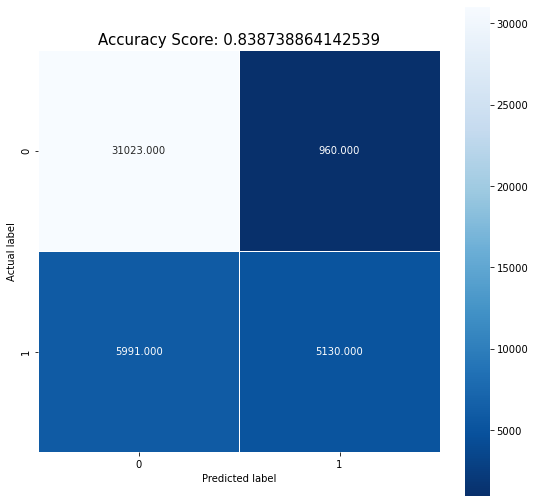

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_LR, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_LR)
plt.title(all_sample_title, size = 15);

In [19]:
print("Recall: ", recall_score(y_test, predictions_LR))
print("Precision: ", precision_score(y_test, predictions_LR))
print("F1_Score", f1_score(y_test, predictions_LR))

Recall:  0.46128945238737523
Precision:  0.8423645320197044
F1_Score 0.5961303817326129


# Train a Decision tree
https://scikit-learn.org/stable/modules/tree.html#tree

In [20]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predictions_decisionTree = dt.predict(x_test)

In [21]:
# Use score method to get accuracy of model
score_DT = dt.score(x_test, y_test)
print(score_DT)
cm_DT = metrics.confusion_matrix(y_test, predictions_decisionTree)
print(cm_DT)

0.8023385300668151
[[27517  4466]
 [ 4054  7067]]


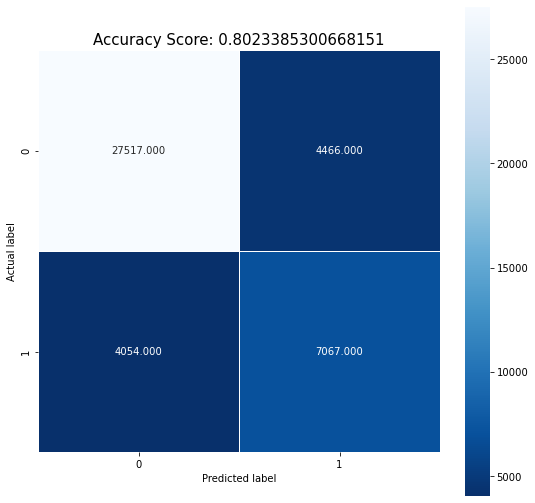

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_DT, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_DT)
plt.title(all_sample_title, size = 15);

In [23]:
print("Recall: ", recall_score(y_test, predictions_decisionTree))
print("Precision: ", precision_score(y_test, predictions_decisionTree))
print("F1_Score", f1_score(y_test, predictions_decisionTree))

Recall:  0.6354644366513803
Precision:  0.6127633746640077
F1_Score 0.623907477708131


In [24]:
# uncomment for tree visualization
# from sklearn.tree import plot_tree
# plt.figure(figsize=(6,6))
# plot_tree(dt);

[0.42011754 0.00715525 0.00314597 0.01045978 0.00301196 0.07718
 0.04723705 0.04162684 0.05742221 0.05875081 0.00472405 0.00070743
 0.05771759 0.04290572 0.00123343 0.00186255 0.04327296 0.03214822
 0.02609241 0.02568727 0.03598446 0.00155652 0.         0.
 0.        ]


<BarContainer object of 25 artists>

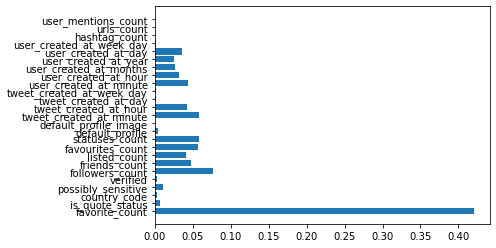

In [25]:
print(dt.feature_importances_)
plt.barh(X_train.columns, dt.feature_importances_)

# Train a RandomForest
https://en.wikipedia.org/wiki/Random_forest

In [26]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predictions_randomForest = rf.predict(x_test)

In [27]:
# Use score method to get accuracy of model
score_RF = rf.score(x_test, y_test)
print(score_RF)
cm_RF = metrics.confusion_matrix(y_test, predictions_randomForest)
print(cm_RF)

0.8631449517446177
[[29915  2068]
 [ 3831  7290]]


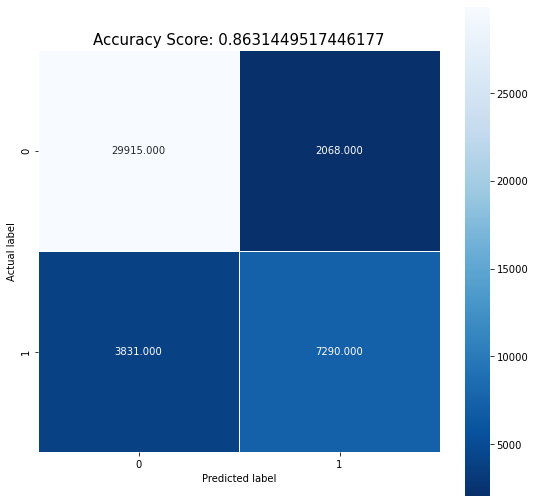

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_RF, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_RF)
plt.title(all_sample_title, size = 15);

In [29]:
print("Recall: ", recall_score(y_test, predictions_randomForest))
print("Precision: ", precision_score(y_test, predictions_randomForest))
print("F1_Score", f1_score(y_test, predictions_randomForest))

Recall:  0.6555165902346911
Precision:  0.7790126095319513
F1_Score 0.7119488256262514


[0.30234187 0.00671884 0.00284545 0.00943926 0.02861478 0.12364542
 0.05472225 0.069145   0.05613166 0.06103531 0.00732436 0.00087256
 0.05376791 0.04123009 0.00236579 0.00240908 0.04270719 0.03529238
 0.02953505 0.02889677 0.03848169 0.00247727 0.         0.
 0.        ]


<BarContainer object of 25 artists>

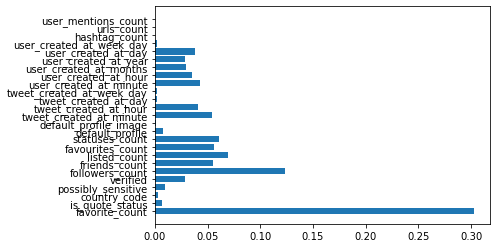

In [30]:
print(rf.feature_importances_)
plt.barh(X_train.columns, rf.feature_importances_)

# Train a XGBoost

In [31]:
import xgboost as xgb
xg = xgb.XGBClassifier(n_estimators=100)
xg.fit(x_train, y_train)
predictions_XGB = xg.predict(x_test)

C:\Users\ALike\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
# Use score method to get accuracy of model
score_xgb = rf.score(x_test, y_test)
print(score_xgb)
cm_xgb = metrics.confusion_matrix(y_test, predictions_XGB)
print(cm_xgb)

0.8631449517446177
[[29964  2019]
 [ 3941  7180]]


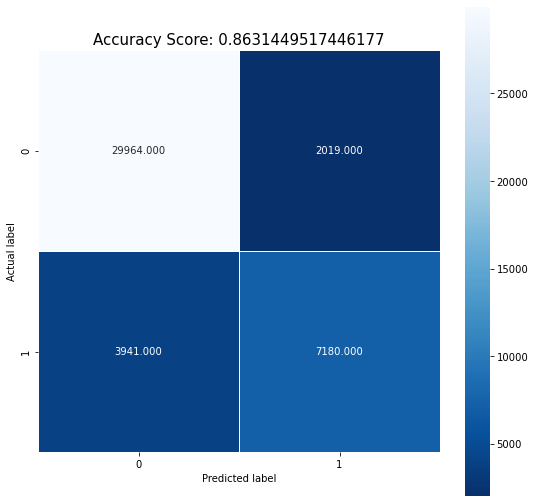

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_xgb, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_xgb)
plt.title(all_sample_title, size = 15);

In [34]:
print("Recall: ", recall_score(y_test, predictions_XGB))
print("Precision: ", precision_score(y_test, predictions_XGB))
print("F1_Score", f1_score(y_test, predictions_XGB))

Recall:  0.6456253933998741
Precision:  0.7805196216980107
F1_Score 0.7066929133858268


[0.67522603 0.0551888  0.00928581 0.05159828 0.01785891 0.03480413
 0.01213832 0.01679421 0.0143824  0.0143451  0.01205912 0.00851454
 0.00724004 0.00836053 0.00851602 0.         0.01014388 0.01012162
 0.00946319 0.01418574 0.00977329 0.         0.         0.
 0.        ]


<BarContainer object of 25 artists>

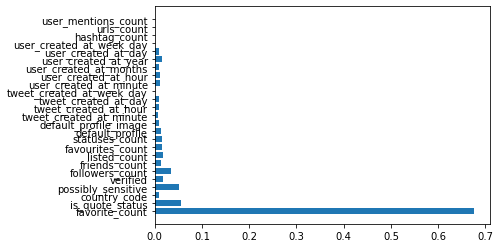

In [35]:
print(xg.feature_importances_)
plt.barh(X_train.columns, xg.feature_importances_)

# XGBoost Customizaed

In [36]:
params = {
    "n_estimators": 25, #number of trees (i.e. iterations)
    "max_depth": 8, # Maximum depth of built trees
    "min_child_weight" : 0, # Minimum sum of instance weight(hessian) needed in a child.
    "subsample": 1.0, # Subsample ratio of the training instance.
    "colsample_bytree" : 1.0 # Subsample ratio of columns when constructing each tree.
}

xg = xgb.XGBClassifier(**params)
xg.fit(x_train, y_train)
predictions_XGB = xg.predict(x_test)

C:\Users\ALike\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:43:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
# Use score method to get accuracy of model
score_xgb = rf.score(x_test, y_test)
print(score_xgb)
cm_xgb = metrics.confusion_matrix(y_test, predictions_XGB)
print(cm_xgb)

0.8631449517446177
[[30021  1962]
 [ 3955  7166]]


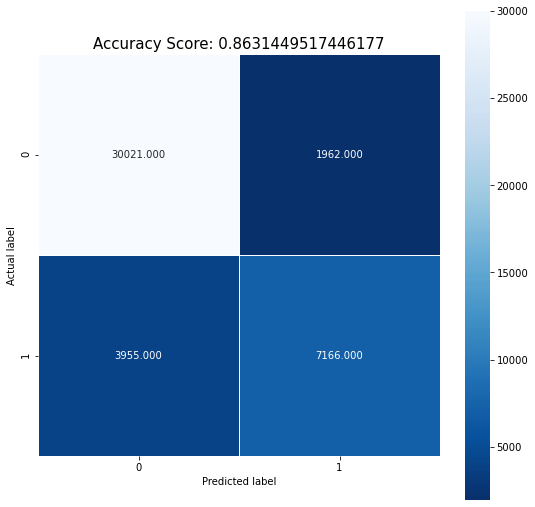

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_xgb, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_xgb)
plt.title(all_sample_title, size = 15);

In [39]:
print("Recall: ", recall_score(y_test, predictions_XGB))
print("Precision: ", precision_score(y_test, predictions_XGB))
print("F1_Score", f1_score(y_test, predictions_XGB))

Recall:  0.6443665138027156
Precision:  0.785056967572305
F1_Score 0.707788038915502


# Support Vector Machines

In [40]:
from sklearn import svm
clf_lin = svm.SVC(kernel='linear', max_iter=1000)
clf_lin.fit(x_train, y_train)
predictions_SVM_lin = clf_lin.predict(x_test)

C:\Users\ALike\.conda\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [41]:
# Use score method to get accuracy of model
score_SVM_lin = clf_lin.score(x_test, y_test)
print(score_SVM_lin)
cm_SVM_lin = metrics.confusion_matrix(y_test, predictions_SVM_lin)
print(cm_SVM_lin)

print("Recall: ", recall_score(y_test, predictions_SVM_lin))
print("Precision: ", precision_score(y_test, predictions_SVM_lin))
print("F1_Score", f1_score(y_test, predictions_SVM_lin))

0.2631078322197476
[[  304 31679]
 [   84 11037]]
Recall:  0.9924467224170488
Precision:  0.258380934544433
F1_Score 0.4100154169065884


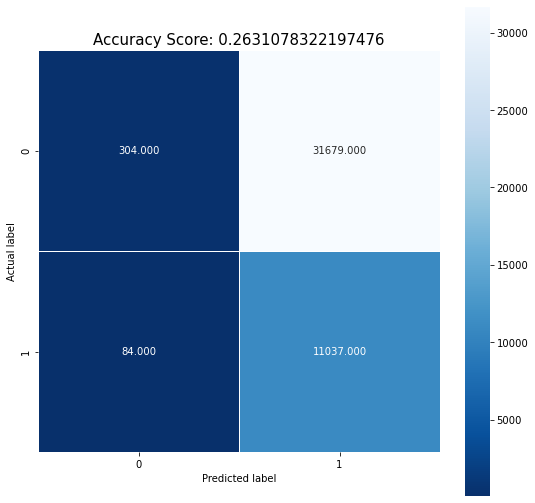

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_SVM_lin, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_SVM_lin)
plt.title(all_sample_title, size = 15);

rbf kernel:

In [43]:
from sklearn import svm
clf_rbf = svm.SVC(kernel='rbf', max_iter=1000)
clf_rbf.fit(x_train, y_train)
predictions_SVM_rbf = clf_rbf.predict(x_test)

C:\Users\ALike\.conda\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [44]:
# Use score method to get accuracy of model
score_SVM_rbf = clf_rbf.score(x_test, y_test)
print(score_SVM_rbf)
cm_SVM_rbf = metrics.confusion_matrix(y_test, predictions_SVM_rbf)
print(cm_SVM_rbf)

print("Recall: ", recall_score(y_test, predictions_SVM_rbf))
print("Precision: ", precision_score(y_test, predictions_SVM_rbf))
print("F1_Score", f1_score(y_test, predictions_SVM_rbf))

0.2516471789161099
[[  443 31540]
 [  717 10404]]
Recall:  0.9355273806312382
Precision:  0.24804501239748236
F1_Score 0.3921228681805333


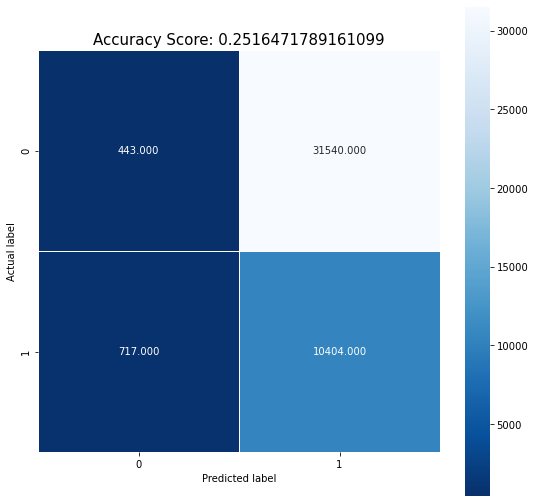

In [45]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_SVM_rbf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_SVM_rbf)
plt.title(all_sample_title, size = 15);

Polynomial kernel:

In [46]:
from sklearn import svm
clf_poly = svm.SVC(kernel='poly', max_iter=1000)
clf_poly.fit(x_train, y_train)
predictions_SVM_poly = clf_poly.predict(x_test)

C:\Users\ALike\.conda\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [47]:
# Use score method to get accuracy of model
score_SVM_poly = clf_poly.score(x_test, y_test)
print(score_SVM_poly)
cm_SVM_poly = metrics.confusion_matrix(y_test, predictions_SVM_poly)
print(cm_SVM_poly)

print("Recall: ", recall_score(y_test, predictions_SVM_poly))
print("Precision: ", precision_score(y_test, predictions_SVM_poly))
print("F1_Score", f1_score(y_test, predictions_SVM_poly))

0.2578646993318486
[[    0 31983]
 [    6 11115]]
Recall:  0.9994604801726463
Precision:  0.25790059863566756
F1_Score 0.41000387318098824


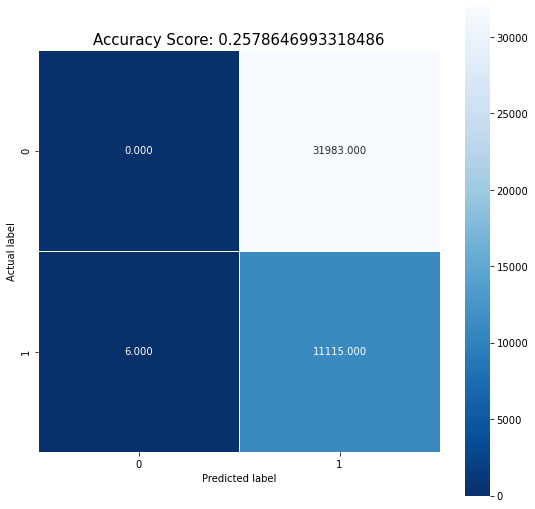

In [48]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_SVM_poly, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_SVM_poly)
plt.title(all_sample_title, size = 15);

# Non-Linear Support Vector Machine
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py

In [49]:
# from sklearn import svm
# clf_non_linear = svm.NuSVC(gamma="auto")
# clf_non_linear.fit(x_train, y_train)
# predictions_SVM_non_linear = clf_non_linear.predict(x_test)

In [50]:
# # Use score method to get accuracy of model
# score_SVM_non_linear = clf_non_linear.score(x_test, y_test)
# print(score_SVM_non_linear)
# cm_SVM_non_linear = metrics.confusion_matrix(y_test, predictions_SVM)
# print(cm_SVM_non_linear)

In [51]:
# plt.figure(figsize=(9,9))
# sns.heatmap(cm_SVM_non_linear, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score_SVM_non_linear)
# plt.title(all_sample_title, size = 15);

In [52]:
# print("Recall: ", recall_score(y_test, predictions_SVM_non_linear))
# print("Precision: ", precision_score(y_test, predictions_SVM_non_linear))
# print("F1_Score", f1_score(y_test, predictions_SVM_non_linear, average="micro"))

# Neural Network

In [53]:
# Scaling
scaler = preprocessing.StandardScaler().fit(X_train)
x_scaled_train = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [ ]:
clf_nn = MLPClassifier(random_state=1, max_iter=300).fit(x_scaled_train, y_train)
# neuralnet_predictions = clf_nn.predict_proba(X_test[:1])
predictions_nn = clf_nn.predict(x_scaled_test)

In [ ]:
# Use score method to get accuracy of model
score_nn = clf_nn.score(x_scaled_test, y_test)
print(score_nn)
cm_nn = metrics.confusion_matrix(y_test, predictions_nn)
print(cm_nn)

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_nn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_nn)
plt.title(all_sample_title, size = 15);

In [ ]:
print("Recall: ", recall_score(y_test, predictions_nn))
print("Precision: ", precision_score(y_test, predictions_nn))
print("F1_Score", f1_score(y_test, predictions_nn))